In [1]:
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
random.seed(5)
np.random.seed(5)

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
!pip install statsmodels

You should consider upgrading via the 'c:\users\user pc\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.



  Attempting uninstall: packaging
    Found existing installation: packaging 21.0
    Uninstalling packaging-21.0:
      Successfully uninstalled packaging-21.0


In [2]:
data = pd.read_csv('Data_Final.csv')
data

,Participant,Gender,Age,Working Experience,Visualization,Fluency,Brightness,Real Scene,Interactivity,Background Music,...,Clear Information,Transparency,Colour contrast,Fatigue,Headache,Eyestrain,Sweating,Nausea,Dizzyness,TII
0,1,M,24,1,5,4,6,5,5,6,...,5,5,5,2,2,4,1,2,1,0.695943
1,2,M,23,1,4,5,5,5,5,6,...,5,5,3,5,2,1,1,2,3,0.782491
2,3,M,26,1,5,5,5,3,5,6,...,5,5,5,3,2,3,1,2,3,0.701257
3,4,M,23,2,5,4,5,5,5,4,...,4,4,6,3,3,1,2,2,1,0.858761
4,5,M,24,2,5,5,5,5,4,4,...,5,4,3,2,0,2,1,2,3,0.765293
5,6,M,25,2,5,5,5,5,5,5,...,5,5,6,3,2,2,2,2,2,0.647992
6,7,M,23,1,5,5,5,4,5,5,...,4,5,4,3,3,0,1,2,1,0.383370
7,8,M,23,1,5,5,5,6,4,5,...,5,5,5,0,3,4,1,1,1,0.544115
8,9,M,24,2,4,3,5,4,4,4,...,5,5,2,1,2,2,1,1,2,0.887182
9,10,F,23,1,5,5,5,5,5,4,...,5,5,6,4,2,4,1,2,1,0.318213


In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [4]:
data.columns

Index(['Participant', 'Gender', 'Age', 'Working Experience', 'Visualization',
       'Fluency', 'Brightness', 'Real Scene', 'Interactivity',
       'Background Music', 'Steps', 'Graphics', 'Handle Vibrations',
       'Ergonomics', 'Clear Information', 'Transparency', 'Colour contrast',
       'Fatigue', 'Headache', 'Eyestrain', 'Sweating', 'Nausea', 'Dizzyness',
       'TII'],
      dtype='object')

In [5]:
data.corr()

,Participant,Age,Working Experience,Visualization,Fluency,Brightness,Real Scene,Interactivity,Background Music,Steps,...,Clear Information,Transparency,Colour contrast,Fatigue,Headache,Eyestrain,Sweating,Nausea,Dizzyness,TII
Participant,1.000000,-0.165940,0.322447,0.113640,-0.051483,-0.377964,-0.134699,0.230697,-0.181641,-0.180503,...,0.351441,-0.299963,4.851505e-02,-0.272648,0.210942,0.017540,0.070088,-0.190238,-6.039647e-02,-0.101416
Age,-0.165940,1.000000,0.192336,0.134577,0.312762,0.096374,0.055106,-0.045752,0.287021,-0.366233,...,0.096374,-0.112538,2.176280e-02,0.122639,-0.137454,0.156730,0.026948,0.080845,3.854882e-01,0.084787
Working Experience,0.322447,0.192336,1.000000,0.061467,-0.161968,-0.207514,0.006245,-0.182953,-0.346362,-0.177028,...,-0.207514,-0.179106,1.405804e-01,-0.177489,-0.347441,-0.418793,0.406181,-0.174078,4.700235e-01,0.672306
Visualization,0.113640,0.134577,0.061467,1.000000,0.244552,0.060132,0.396312,0.134577,0.218446,-0.461685,...,-0.207123,-0.009159,2.851566e-01,-0.274722,0.100680,-0.137851,-0.050443,0.050443,-7.824312e-02,0.013958
Fluency,-0.051483,0.312762,-0.161968,0.244552,1.000000,-0.214047,0.310953,0.154401,0.177677,-0.258056,...,0.045404,-0.026674,1.977351e-01,0.295926,-0.249779,0.147550,0.048970,0.146911,1.097173e-01,-0.210367
Brightness,-0.377964,0.096374,-0.207514,0.060132,-0.214047,1.000000,0.128297,0.096374,0.325552,0.036736,...,-0.052632,0.168345,1.069656e-01,-0.088935,-0.088121,0.306279,-0.132453,0.132453,-1.597940e-01,0.077618
Real Scene,-0.134699,0.055106,0.006245,0.396312,0.310953,0.128297,1.000000,-0.234925,-0.037789,-0.288547,...,-0.061773,-0.149816,8.691454e-02,-0.050852,0.055691,0.208645,0.179374,-0.035875,-1.669372e-01,0.037185
Interactivity,0.230697,-0.045752,-0.182953,0.134577,0.154401,0.096374,-0.234925,1.000000,0.350102,-0.067267,...,0.096374,-0.014679,4.570188e-01,0.524735,0.340646,-0.107634,0.242536,0.404226,-1.253998e-01,-0.200705
Background Music,-0.181641,0.287021,-0.346362,0.218446,0.177677,0.325552,-0.037789,0.350102,1.000000,-0.119025,...,0.118852,0.375434,3.150642e-02,0.259044,0.198994,-0.144888,-0.273096,0.117041,3.160204e-01,-0.013852
Steps,-0.180503,-0.366233,-0.177028,-0.461685,-0.258056,0.036736,-0.288547,-0.067267,-0.119025,1.000000,...,-0.208170,0.218218,-1.493203e-01,-0.006897,-0.143516,0.110128,-0.092450,0.277350,-4.780004e-02,-0.116521


In [6]:
le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])
data

,Participant,Gender,Age,Working Experience,Visualization,Fluency,Brightness,Real Scene,Interactivity,Background Music,...,Clear Information,Transparency,Colour contrast,Fatigue,Headache,Eyestrain,Sweating,Nausea,Dizzyness,TII
0,1,1,24,1,5,4,6,5,5,6,...,5,5,5,2,2,4,1,2,1,0.695943
1,2,1,23,1,4,5,5,5,5,6,...,5,5,3,5,2,1,1,2,3,0.782491
2,3,1,26,1,5,5,5,3,5,6,...,5,5,5,3,2,3,1,2,3,0.701257
3,4,1,23,2,5,4,5,5,5,4,...,4,4,6,3,3,1,2,2,1,0.858761
4,5,1,24,2,5,5,5,5,4,4,...,5,4,3,2,0,2,1,2,3,0.765293
5,6,1,25,2,5,5,5,5,5,5,...,5,5,6,3,2,2,2,2,2,0.647992
6,7,1,23,1,5,5,5,4,5,5,...,4,5,4,3,3,0,1,2,1,0.383370
7,8,1,23,1,5,5,5,6,4,5,...,5,5,5,0,3,4,1,1,1,0.544115
8,9,1,24,2,4,3,5,4,4,4,...,5,5,2,1,2,2,1,1,2,0.887182
9,10,0,23,1,5,5,5,5,5,4,...,5,5,6,4,2,4,1,2,1,0.318213


**Ordinal Encoding**

In [16]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
data[['Visualization',
       'Fluency', 'Brightness', 'Real Scene', 'Interactivity',
       'Background Music', 'Steps', 'Graphics', 'Handle Vibrations',
       'Ergonomics', 'Clear Information', 'Transparency', 'Colour contrast',
       'Fatigue', 'Headache', 'Eyestrain', 'Sweating', 'Nausea', 'Dizzyness',]]=enc.fit_transform(data[['Visualization',
       'Fluency', 'Brightness', 'Real Scene', 'Interactivity',
       'Background Music', 'Steps', 'Graphics', 'Handle Vibrations',
       'Ergonomics', 'Clear Information', 'Transparency', 'Colour contrast',
       'Fatigue', 'Headache', 'Eyestrain', 'Sweating', 'Nausea', 'Dizzyness',]])

In [31]:
data

,Participant,Gender,Age,Working Experience,Visualization,Fluency,Brightness,Real Scene,Interactivity,Background Music,...,Clear Information,Transparency,Colour contrast,Fatigue,Headache,Eyestrain,Sweating,Nausea,Dizzyness,TII
0,1,1,24,1,1.0,1.0,1.0,2.0,1.0,2.0,...,1.0,1.0,3.0,2.0,1.0,4.0,0.0,1.0,1.0,0.695943
1,2,1,23,1,0.0,2.0,0.0,2.0,1.0,2.0,...,1.0,1.0,1.0,5.0,1.0,1.0,0.0,1.0,3.0,0.782491
2,3,1,26,1,1.0,2.0,0.0,0.0,1.0,2.0,...,1.0,1.0,3.0,3.0,1.0,3.0,0.0,1.0,3.0,0.701257
3,4,1,23,2,1.0,1.0,0.0,2.0,1.0,0.0,...,0.0,0.0,4.0,3.0,2.0,1.0,1.0,1.0,1.0,0.858761
4,5,1,24,2,1.0,2.0,0.0,2.0,0.0,0.0,...,1.0,0.0,1.0,2.0,0.0,2.0,0.0,1.0,3.0,0.765293
5,6,1,25,2,1.0,2.0,0.0,2.0,1.0,1.0,...,1.0,1.0,4.0,3.0,1.0,2.0,1.0,1.0,2.0,0.647992
6,7,1,23,1,1.0,2.0,0.0,1.0,1.0,1.0,...,0.0,1.0,2.0,3.0,2.0,0.0,0.0,1.0,1.0,0.383370
7,8,1,23,1,1.0,2.0,0.0,3.0,0.0,1.0,...,1.0,1.0,3.0,0.0,2.0,4.0,0.0,0.0,1.0,0.544115
8,9,1,24,2,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,1.0,0.0,1.0,1.0,2.0,0.0,0.0,2.0,0.887182
9,10,0,23,1,1.0,2.0,0.0,2.0,1.0,0.0,...,1.0,1.0,4.0,4.0,1.0,4.0,0.0,1.0,1.0,0.318213


# Train Test Split

In [17]:
x_train,x_test,y_train,y_test = train_test_split(data[['Gender', 'Age', 'Working Experience', 'Visualization','Fluency', 'Brightness', 'Real Scene', 'Interactivity',
       'Background Music', 'Steps', 'Graphics', 'Handle Vibrations',
       'Ergonomics', 'Clear Information', 'Transparency', 'Colour contrast',
       'Fatigue', 'Headache', 'Eyestrain', 'Sweating', 'Nausea', 'Dizzyness']], data['TII'], test_size=0.3, random_state=42)

# MLP WITHOUT BOOTSTRAPPING

In [18]:
from sklearn.linear_model import LinearRegression

In [19]:
x_train

,Gender,Age,Working Experience,Visualization,Fluency,Brightness,Real Scene,Interactivity,Background Music,Steps,...,Ergonomics,Clear Information,Transparency,Colour contrast,Fatigue,Headache,Eyestrain,Sweating,Nausea,Dizzyness
11,0,23,1,1.0,2.0,0.0,1.0,1.0,1.0,2.0,...,0.0,2.0,1.0,2.0,2.0,1.0,3.0,0.0,0.0,1.0
3,1,23,2,1.0,1.0,0.0,2.0,1.0,0.0,2.0,...,1.0,0.0,0.0,4.0,3.0,2.0,1.0,1.0,1.0,1.0
18,1,22,2,1.0,1.0,0.0,1.0,1.0,0.0,3.0,...,0.0,0.0,1.0,3.0,1.0,1.0,2.0,0.0,1.0,2.0
16,0,25,2,1.0,2.0,0.0,2.0,1.0,2.0,2.0,...,0.0,1.0,1.0,3.0,4.0,1.0,2.0,0.0,1.0,4.0
13,0,24,1,0.0,1.0,0.0,1.0,1.0,1.0,2.0,...,1.0,2.0,0.0,2.0,3.0,3.0,3.0,0.0,1.0,1.0
2,1,26,1,1.0,2.0,0.0,0.0,1.0,2.0,2.0,...,0.0,1.0,1.0,3.0,3.0,1.0,3.0,0.0,1.0,3.0
9,0,23,1,1.0,2.0,0.0,2.0,1.0,0.0,1.0,...,1.0,1.0,1.0,4.0,4.0,1.0,4.0,0.0,1.0,1.0
19,1,24,2,1.0,2.0,0.0,1.0,1.0,1.0,1.0,...,0.0,1.0,0.0,2.0,1.0,1.0,2.0,0.0,1.0,1.0
4,1,24,2,1.0,2.0,0.0,2.0,0.0,0.0,2.0,...,0.0,1.0,0.0,1.0,2.0,0.0,2.0,0.0,1.0,3.0
12,0,23,1,0.0,2.0,0.0,2.0,1.0,0.0,3.0,...,1.0,2.0,0.0,2.0,3.0,1.0,5.0,1.0,1.0,0.0


In [33]:
dat = x_train.copy()
dat['TII'] = y_train
dat

,Gender,Age,Working Experience,Visualization,Fluency,Brightness,Real Scene,Interactivity,Background Music,Steps,...,Clear Information,Transparency,Colour contrast,Fatigue,Headache,Eyestrain,Sweating,Nausea,Dizzyness,TII
11,0,23,1,1.0,2.0,0.0,1.0,1.0,1.0,2.0,...,2.0,1.0,2.0,2.0,1.0,3.0,0.0,0.0,1.0,0.075691
3,1,23,2,1.0,1.0,0.0,2.0,1.0,0.0,2.0,...,0.0,0.0,4.0,3.0,2.0,1.0,1.0,1.0,1.0,0.858761
18,1,22,2,1.0,1.0,0.0,1.0,1.0,0.0,3.0,...,0.0,1.0,3.0,1.0,1.0,2.0,0.0,1.0,2.0,0.806443
16,0,25,2,1.0,2.0,0.0,2.0,1.0,2.0,2.0,...,1.0,1.0,3.0,4.0,1.0,2.0,0.0,1.0,4.0,0.573108
13,0,24,1,0.0,1.0,0.0,1.0,1.0,1.0,2.0,...,2.0,0.0,2.0,3.0,3.0,3.0,0.0,1.0,1.0,0.192631
2,1,26,1,1.0,2.0,0.0,0.0,1.0,2.0,2.0,...,1.0,1.0,3.0,3.0,1.0,3.0,0.0,1.0,3.0,0.701257
9,0,23,1,1.0,2.0,0.0,2.0,1.0,0.0,1.0,...,1.0,1.0,4.0,4.0,1.0,4.0,0.0,1.0,1.0,0.318213
19,1,24,2,1.0,2.0,0.0,1.0,1.0,1.0,1.0,...,1.0,0.0,2.0,1.0,1.0,2.0,0.0,1.0,1.0,0.851626
4,1,24,2,1.0,2.0,0.0,2.0,0.0,0.0,2.0,...,1.0,0.0,1.0,2.0,0.0,2.0,0.0,1.0,3.0,0.765293
12,0,23,1,0.0,2.0,0.0,2.0,1.0,0.0,3.0,...,2.0,0.0,2.0,3.0,1.0,5.0,1.0,1.0,0.0,0.447707


In [34]:
dat.to_csv('dat.csv',index=False)

In [20]:
reg = LinearRegression()
reg.fit(x_train,y_train)
y_pred = reg.predict(x_test)

In [21]:
from sklearn.metrics import r2_score

In [22]:
r2_score(y_test, y_pred)

-0.2859636104708696

# MLR WITH BOOTSTRAP

In [23]:
data.shape

(20, 24)

In [24]:
# resample with replacement each row
r2 = []
y_pred_boot = []
y_test_boot = []
n_boots = 1000
for _ in range(n_boots):
  # sample the rows, same size, with replacement
  sample_df = data.sample(n=20, replace=True)
  #Train test split
  x_train,x_test,y_train,y_test = train_test_split(data[['Gender', 'Age', 'Working Experience', 'Visualization','Fluency', 'Brightness', 'Real Scene', 'Interactivity',
        'Background Music', 'Steps', 'Graphics', 'Handle Vibrations',
        'Ergonomics', 'Clear Information', 'Transparency', 'Colour contrast',
        'Fatigue', 'Headache', 'Eyestrain', 'Sweating', 'Nausea', 'Dizzyness']], data['TII'], test_size=0.3, random_state=42)
  # fit a linear regression
  reg = LinearRegression()
  reg.fit(x_train,y_train)
  y_pred = reg.predict(x_test)
  #Append test data
  y_test_boot.append(y_test)
  # append predictions
  y_pred_boot.append(y_pred)
  # #r2 score
  # r2.append(r2_score(y_test, y_pred))

In [25]:
y_pred_boot = np.array(y_pred_boot)

In [26]:
len(y_train)

14

In [27]:
y_pred = np.average(y_pred_boot,axis=0)
y_pred

array([0.93516043, 0.50825384, 0.36870613, 0.5305904 , 0.62763567,
       1.00634732])

In [28]:
y_test_boot = np.array(y_test_boot)
y_test = np.average(y_test_boot,axis=0)
y_test

array([0.69594344, 0.83932184, 0.13774397, 0.78249053, 0.88718187,
       0.64799241])

In [29]:
r2_score(y_test, y_pred)

-0.2859636104708565

# Random Forest Regressor

In [35]:
x_train,x_test,y_train,y_test = train_test_split(data[['Gender', 'Age', 'Working Experience', 'Visualization','Fluency', 'Brightness', 'Real Scene', 'Interactivity',
       'Background Music', 'Steps', 'Graphics', 'Handle Vibrations',
       'Ergonomics', 'Clear Information', 'Transparency', 'Colour contrast',
       'Fatigue', 'Headache', 'Eyestrain', 'Sweating', 'Nausea', 'Dizzyness']], data['TII'], test_size=0.3, random_state=42)

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
#regr = RandomForestRegressor(max_depth=25, random_state=42)

# regr = RandomForestRegressor(max_depth=25, random_state=42)
# regr.fit(x_train, y_train)


**Hyperparameter optimization**

In [37]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = { 
    'n_estimators': [10,20,30,40],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [1],
    # 'criterion' :['gini', 'entropy'],
    'bootstrap' : [True,False]
}
# Create a based model
rf = RandomForestRegressor(random_state=42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 5)

In [38]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid={'bootstrap': [True, False], 'max_depth': [1],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10, 20, 30, 40]})

In [39]:
grid_search.best_params_

{'bootstrap': False,
 'max_depth': 1,
 'max_features': 'sqrt',
 'n_estimators': 30}

In [40]:
model = grid_search.best_estimator_

In [41]:
y_pred = model.predict(x_test)

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
r2_score(y_test, y_pred)

0.3718121841125003

# Decision Tree Rregressor

In [ ]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
# regressor = DecisionTreeRegressor(random_state = 42)
# regressor.fit(x_train, y_train)

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(data[['Gender', 'Age', 'Working Experience', 'Visualization','Fluency', 'Brightness', 'Real Scene', 'Interactivity',
       'Background Music', 'Steps', 'Graphics', 'Handle Vibrations',
       'Ergonomics', 'Clear Information', 'Transparency', 'Colour contrast',
       'Fatigue', 'Headache', 'Eyestrain', 'Sweating', 'Nausea', 'Dizzyness']], data['TII'], test_size=0.3, random_state=42)

**HyperParameter Optimization of decision trees**

In [ ]:
param_grid = { 
    'splitter':['best','random'],
    'max_depth' :[2,4,6,8,10,12]
}
# Create a based model
regressor = DecisionTreeRegressor(random_state = 42)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = regressor, param_grid = param_grid, 
                          cv = 5)

In [ ]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'max_depth': [2, 4, 6, 8, 10, 12],
                         'splitter': ['best', 'random']})

In [ ]:
grid_search.best_params_

{'max_depth': 6, 'splitter': 'best'}

In [ ]:
model = grid_search.best_estimator_

In [ ]:
y_pred = model.predict(x_test)

In [ ]:
r2_score(y_test, y_pred)

0.8783652989366354

**Feature Importance**

In [ ]:
model.feature_importances_

array([6.84824949e-02, 0.00000000e+00, 5.46962218e-01, 2.17276034e-02,
       7.18931639e-03, 0.00000000e+00, 0.00000000e+00, 8.90254161e-04,
       2.02630788e-01, 2.70207396e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       5.29444222e-04, 0.00000000e+00, 1.19487052e-01, 2.67641702e-05,
       0.00000000e+00, 5.05332526e-03])

In [ ]:
fea_imp = pd.DataFrame()
fea_imp['Features'] = ['Gender', 'Age', 'Working Experience', 'Visualization','Fluency', 'Brightness', 'Real Scene', 'Interactivity',
       'Background Music', 'Steps', 'Graphics', 'Handle Vibrations',
       'Ergonomics', 'Clear Information', 'Transparency', 'Colour contrast',
       'Fatigue', 'Headache', 'Eyestrain', 'Sweating', 'Nausea', 'Dizzyness']
fea_imp['Importance'] = model.feature_importances_

Kiddo I had made feature importance dataframe and I will plot it also so that you could get idea about the which features are important and could be used for inferential purposes.

**Okay Chutku samjha kya**

In [ ]:
fea_imp

,Features,Importance
0,Gender,0.068482
1,Age,0.000000
2,Working Experience,0.546962
3,Visualization,0.021728
4,Fluency,0.007189
5,Brightness,0.000000
6,Real Scene,0.000000
7,Interactivity,0.000890
8,Background Music,0.202631
9,Steps,0.027021


Text(0, 0.5, 'Features')

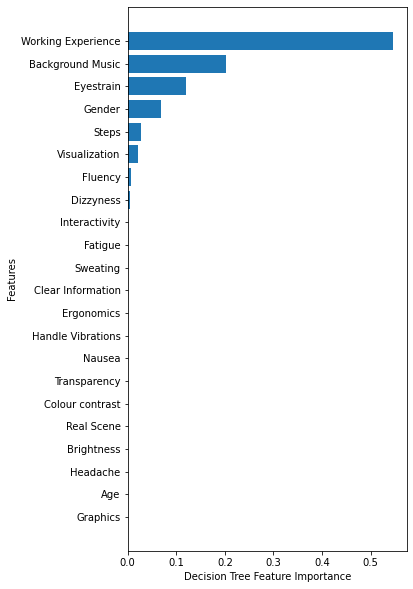

In [ ]:
sorted_idx = model.feature_importances_.argsort()
plt.figure(figsize=(5,10))
plt.barh(fea_imp.Features[sorted_idx],  model.feature_importances_[sorted_idx])
plt.xlabel("Decision Tree Feature Importance")
plt.ylabel('Features')

Kiddo here is the plot of the decision tree used for regression if you want you could attach in ppt 

[Text(0.5138888888888888, 0.9166666666666666, 'X[2] <= 1.5\nsquared_error = 0.068\nsamples = 14\nvalue = 0.583'),
 Text(0.3611111111111111, 0.75, 'X[8] <= 5.5\nsquared_error = 0.042\nsamples = 8\nvalue = 0.417'),
 Text(0.2222222222222222, 0.5833333333333334, 'X[18] <= 3.5\nsquared_error = 0.024\nsamples = 6\nvalue = 0.327'),
 Text(0.1111111111111111, 0.4166666666666667, 'X[18] <= 1.5\nsquared_error = 0.016\nsamples = 3\nvalue = 0.217'),
 Text(0.05555555555555555, 0.25, 'squared_error = 0.0\nsamples = 1\nvalue = 0.383'),
 Text(0.16666666666666666, 0.25, 'X[4] <= 4.5\nsquared_error = 0.003\nsamples = 2\nvalue = 0.134'),
 Text(0.1111111111111111, 0.08333333333333333, 'squared_error = 0.0\nsamples = 1\nvalue = 0.193'),
 Text(0.2222222222222222, 0.08333333333333333, 'squared_error = -0.0\nsamples = 1\nvalue = 0.076'),
 Text(0.3333333333333333, 0.4166666666666667, 'X[9] <= 4.5\nsquared_error = 0.009\nsamples = 3\nvalue = 0.437'),
 Text(0.2777777777777778, 0.25, 'squared_error = 0.0\nsamples 

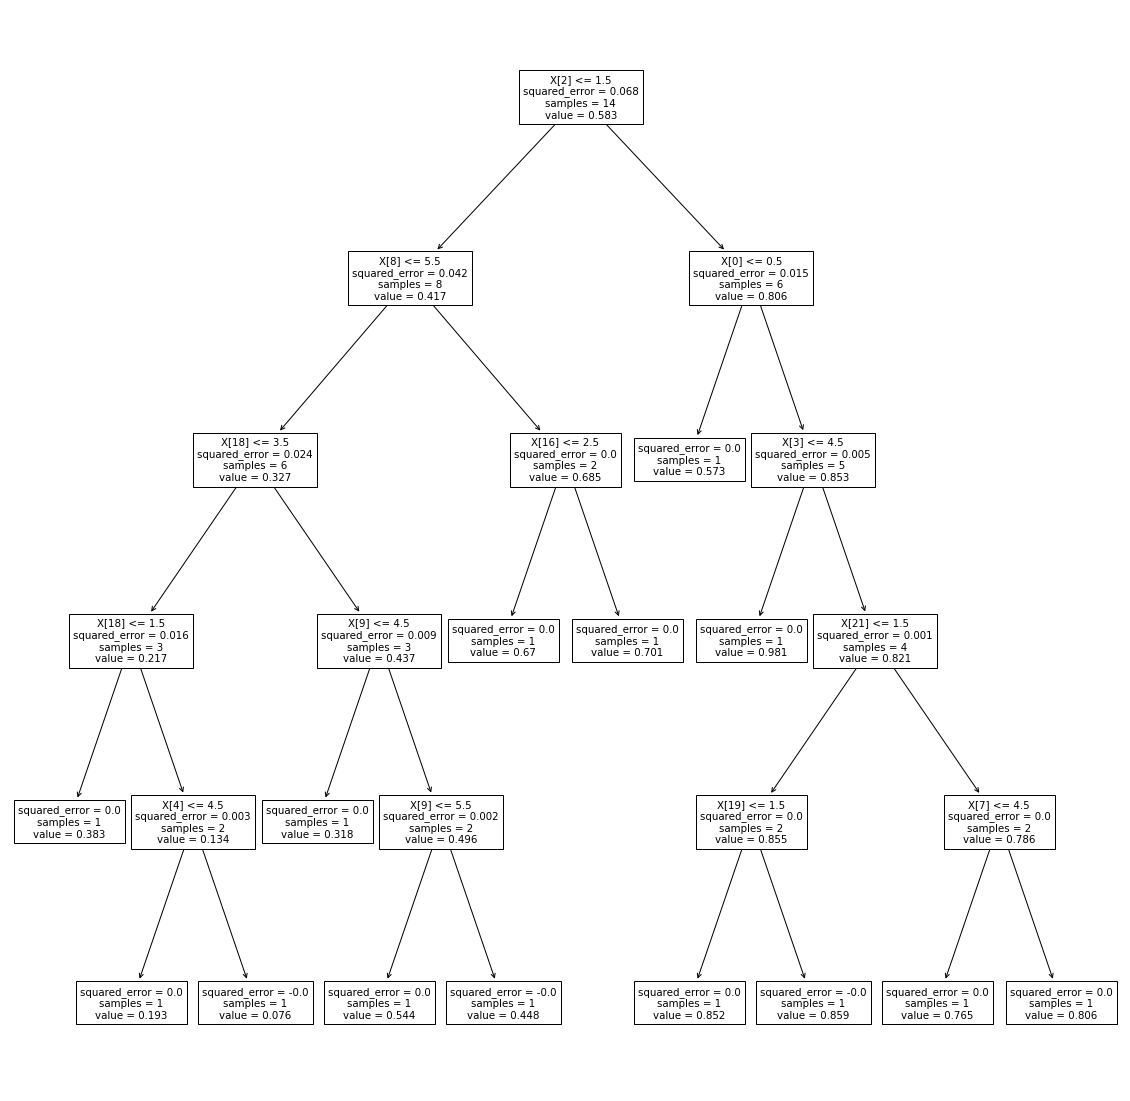

In [ ]:
plt.figure(figsize=(20,20))
tree.plot_tree(model)

**Decision Tree Bootstrapping**

In [ ]:
# resample with replacement each row
y_pred_boot = []
y_test_boot = []
n_boots = 1000
for _ in range(n_boots):
  # sample the rows, same size, with replacement
  sample_df = data.sample(n=20, replace=True)
  #Train test split
  x_train,x_test,y_train,y_test = train_test_split(data[['Gender', 'Age', 'Working Experience', 'Visualization','Fluency', 'Brightness', 'Real Scene', 'Interactivity',
        'Background Music', 'Steps', 'Graphics', 'Handle Vibrations',
        'Ergonomics', 'Clear Information', 'Transparency', 'Colour contrast',
        'Fatigue', 'Headache', 'Eyestrain', 'Sweating', 'Nausea', 'Dizzyness']], data['TII'], test_size=0.3, random_state=42)
  # fit a linear regression
  param_grid = { 
      'splitter':['best','random'],
      'max_depth' :[2,4,6,8,10,12]
  }
  # Create a based model
  regressor = DecisionTreeRegressor(random_state = 42)
  # Instantiate the grid search model
  grid_search = GridSearchCV(estimator = regressor, param_grid = param_grid, 
                            cv = 5)
  grid_search.fit(x_train, y_train)
  model = grid_search.best_estimator_
  y_pred = model.predict(x_test)
  #Append test data
  y_test_boot.append(y_test)
  # append predictions
  y_pred_boot.append(y_pred)
  # #r2 score
  # r2.append(r2_score(y_test, y_pred))

In [ ]:
y_pred_boot = np.array(y_pred_boot)

In [ ]:
y_pred = np.average(y_pred_boot,axis=0)
y_pred

array([0.66952275, 0.80644317, 0.19263084, 0.70125706, 0.98124871,
       0.80644317])

In [ ]:
y_test_boot = np.array(y_test_boot)
y_test = np.average(y_test_boot,axis=0)
y_test

array([0.69594344, 0.83932184, 0.13774397, 0.78249053, 0.88718187,
       0.64799241])

In [ ]:
r2_score(y_test, y_pred)

0.8783652989366268